<a href="https://colab.research.google.com/github/josho08/cd-my-first-repo/blob/main/SlumImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentaiton Practice:


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
from IPython.display import display

In [ ]:
im1 = Image.open("/home/testDrive/Artboard 1.jpg")
mask = Image.open("/home/testDrive/mask.jpg")

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
tensorImage = transform(im1)
tensorMask = transform(mask)

In [ ]:
resulted_Calc = tensorImage * tensorMask

In [ ]:
to_pil_image = transforms.ToPILImage()
result = to_pil_image(resulted_Calc)

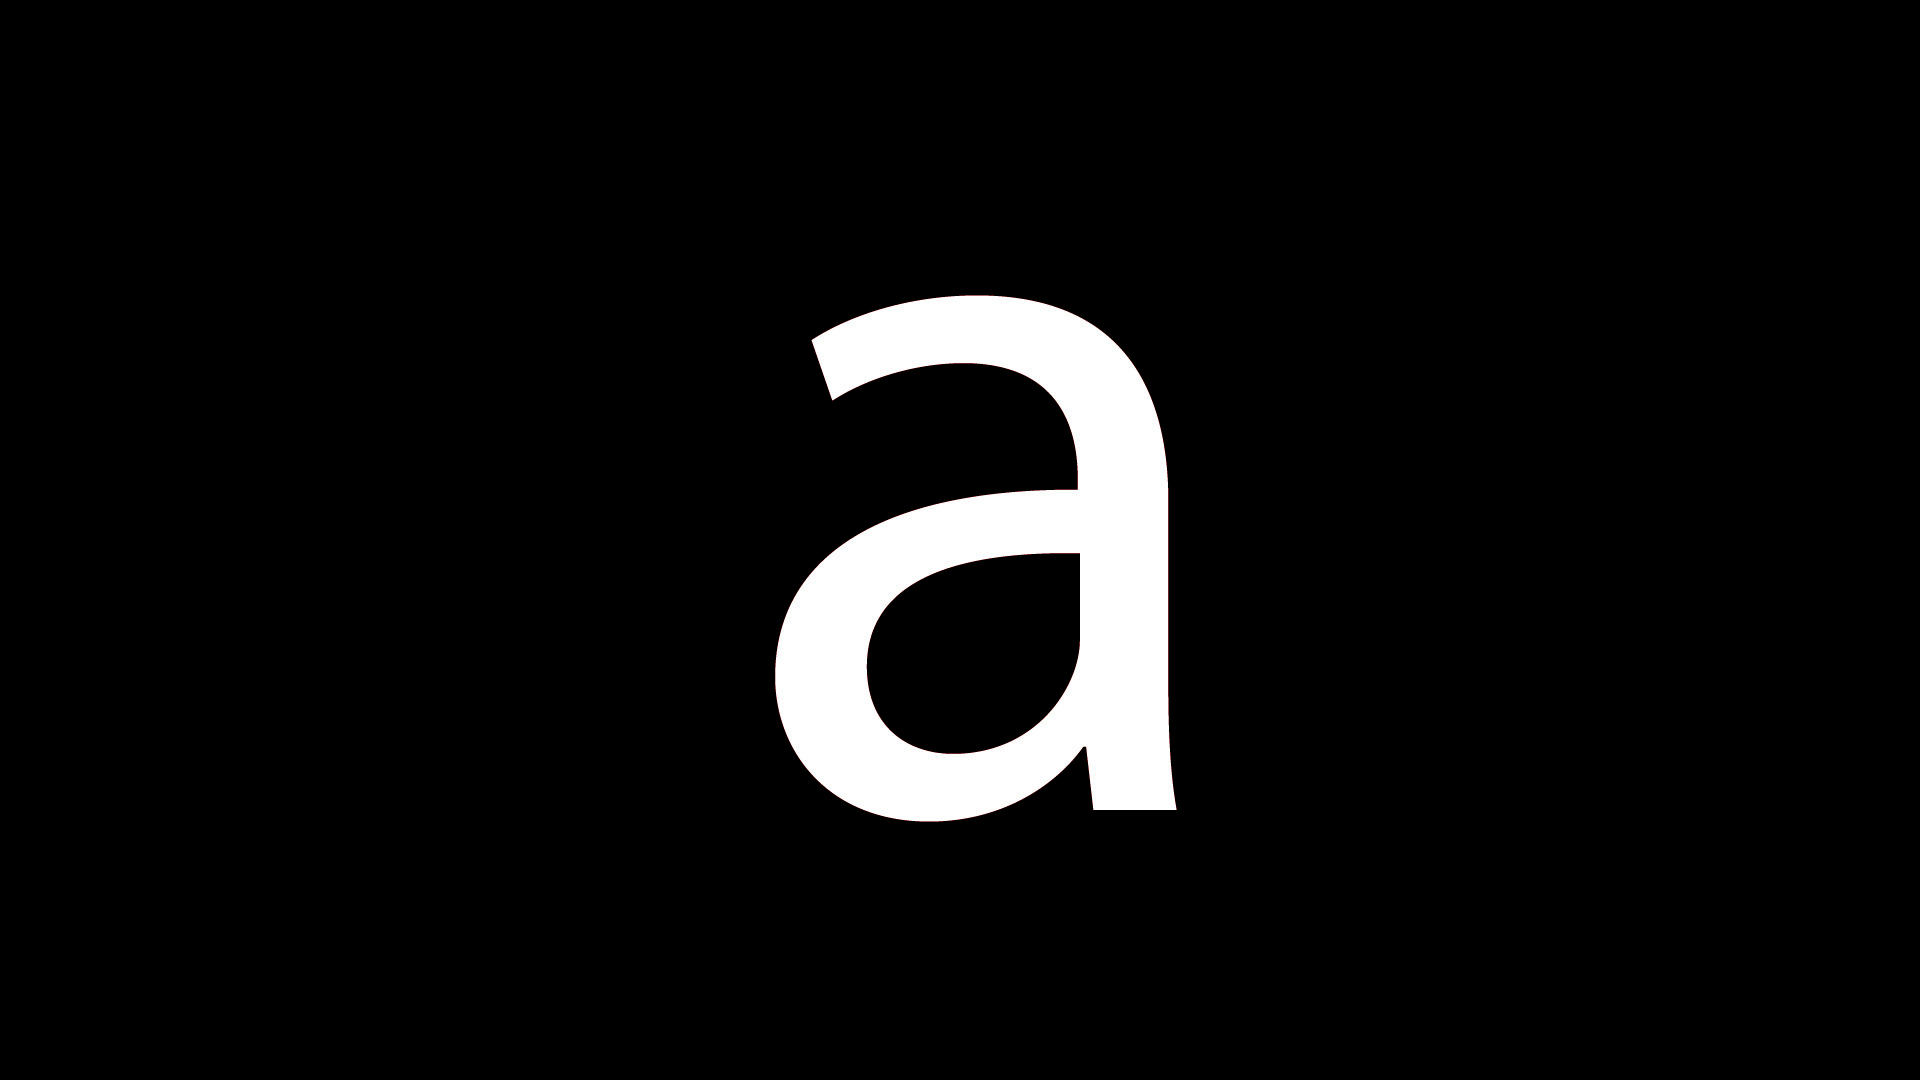

In [ ]:
display(result)

#Instance Image Segmentation with Mask R-CNN

In [ ]:
from torchvision.models.detection import maskrcnn_resnet50_fpn

In [ ]:
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:03<00:00, 45.9MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [ ]:
import numpy as np
image=np.asarray(tensorImage)
print(image)

[[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [ ]:
#tesnorImage2 = transform(im1).unsqeeze(0)

AttributeError: 'Tensor' object has no attribute 'unsqeeze'

In [ ]:
testImage = Image.open("/home/testDrive/testPic.jpg")
testImage_torch = transform(testImage)


if len(testImage_torch.shape) == 2:
    testImage_torch = tensorImage.unsqueeze(0).repeat(3, 1, 1)

testImage_torch = testImage_torch.unsqueeze(0)

In [ ]:
with torch.no_grad():
  prediction =  model(testImage_torch)

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


TypeError: Invalid shape (100, 1, 1280, 960) for image data

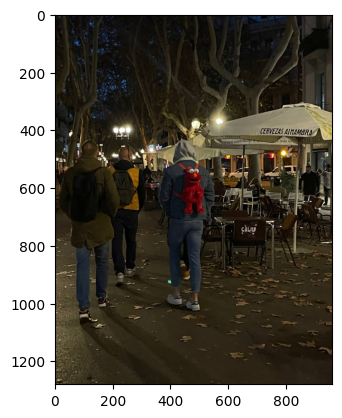

In [ ]:
import matplotlib.pyplot as plt
prediction[0]["labels"]
# for i in range(len(prediction[0]["labels"])):
#   print(COCO_INSTANCE_CATEGORY_NAMES[prediction[0]["labels"][i]])
#   masks = prediction[0]["masks"]
#   labels = prediction[0]["labels"]

i = 11

plt.imshow(testImage)
plt.imshow(masks[i,0], cmap = "jet", alpha = 0.5)
print(COCO_INSTANCE_CATEGORY_NAMES[prediction[0]["labels"][i]])

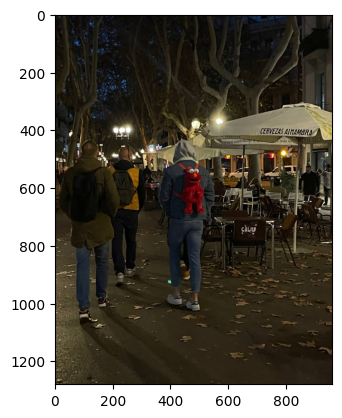

In [ ]:
 plt.imshow(testImage)

In [ ]:
model2 = UNet()

NameError: name 'UNet' is not defined